In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [2]:
# Charger le fichier JSON
file_path = 'cleaned_articles_fr.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df = pd.DataFrame(data)
df

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,dmarrage lpidmie bronchiolite mtropole liledef...,enfants ans vus urgences atteints dune bronchi...,lpidmie annuelle bronchiolite maladie dangereu...,dmarrage lpidmie bronchiolite mtropole liledef...,[],[],[]
1,coronavirus conditions indemniser maladie prof...,cour constitutionnelle invalid jeudi condition...,maisons repos retenu leons covid choses quon d...,coronavirus condition indemniser maladie profe...,[],[],[]
2,cest doute mort reboot film blade,disney marvel repouss reboot film blade date i...,disney marvel repouss reboot film blade date i...,cest doute mort reboot film blade disney marve...,[],[],[]
3,donald trump rle veut donner kennedy jr cas vi...,donald trump promet donner robert kennedy jr p...,tatsunis promesse inquitante scrutin novembre ...,donald trump rle vouloir donner kennedy jr cas...,[],[],[]
4,retard er vol commercial dariane malheureuse l...,aprs vol inaugural dariane survenu lt fin lann...,aprs vol inaugural dariane survenu lt fin lann...,retard er vol commercial dariane malheureux la...,[],[],[]
...,...,...,...,...,...,...,...
58,acadmie franaise dfinitions fausses fellation ...,mercredi lacadmie franaise sorti neuvime dicti...,mercredi lacadmie franaise dvoil neuvime ditio...,acadmie franaise dfinition faux fellation cunn...,[],[],[]
59,aligner jours carence fonction publique priv m...,aligner dlai carence public priv mesure lviden...,aligner dlai carence public priv propose gouve...,aligner jour carencer fonction public priv mes...,[],[],[]
60,robert kennedy jr tte sant amricaine nouvelle ...,donald trump annonc quil donnerait carte blanc...,robert kennedy jr aider lamrique tre bonne san...,robert kennedy jr tte sant amricaine nouveau r...,[],[],[]
61,enjeux critiques plante aprs rlection donald t...,environnement technologie sant gopolitique don...,environnement technologie sant gopolitique don...,enjeux critique plant apr rlection donald trum...,[],[],[]


In [3]:
df.describe

<bound method NDFrame.describe of                                                 title  \
0   dmarrage lpidmie bronchiolite mtropole liledef...   
1   coronavirus conditions indemniser maladie prof...   
2                   cest doute mort reboot film blade   
3   donald trump rle veut donner kennedy jr cas vi...   
4   retard er vol commercial dariane malheureuse l...   
..                                                ...   
58  acadmie franaise dfinitions fausses fellation ...   
59  aligner jours carence fonction publique priv m...   
60  robert kennedy jr tte sant amricaine nouvelle ...   
61  enjeux critiques plante aprs rlection donald t...   
62  dealers femmes voiles accuss casseurs lusage m...   

                                          description  \
0   enfants ans vus urgences atteints dune bronchi...   
1   cour constitutionnelle invalid jeudi condition...   
2   disney marvel repouss reboot film blade date i...   
3   donald trump promet donner robert kennedy jr p...

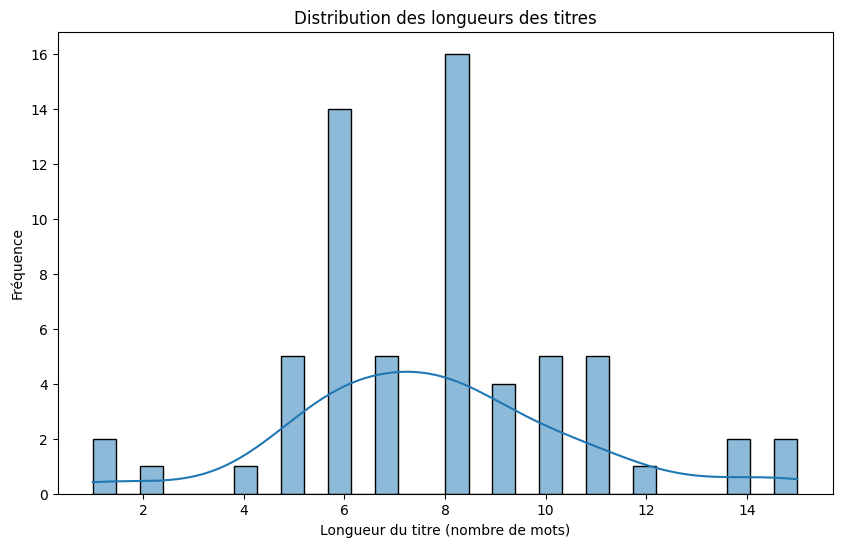

In [4]:
# Calcul de la longueur des titres
df['title_length'] = df['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

In [5]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

trump            9
donald           8
premire          5
contact          4
monde            4
vaccin           4
lantwerp         4
cest             3
covid            3
complotistes     3
franaise         3
dune             3
poutine          3
jr               3
faillite         3
prsidentielle    3
rappels          3
prts             3
sant             3
retourne         3
dtype: int64


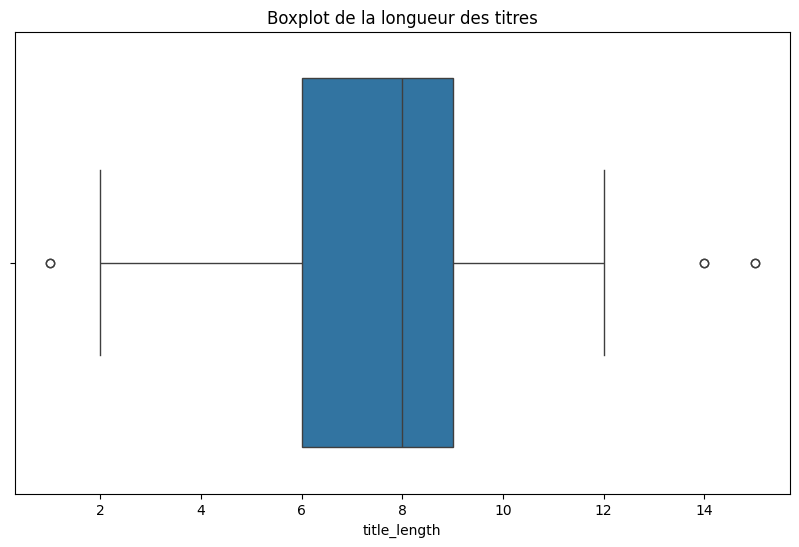

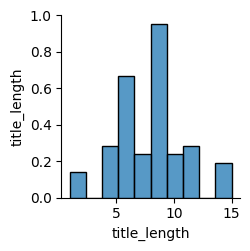

In [7]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

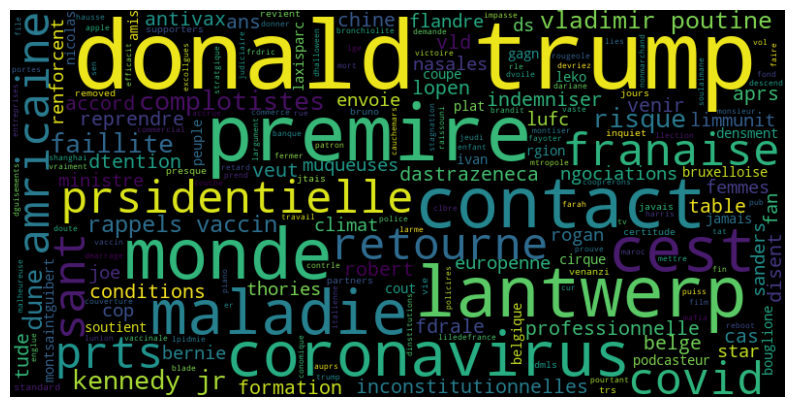

In [6]:
from wordcloud import WordCloud

# Générer le nuage de mots à partir des titres
wordcloud = WordCloud(stopwords='english', width=800, height=400).generate(' '.join(df['title']))

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
import spacy

# Charger le modèle en anglais de spaCy
nlp = spacy.load('en_core_web_sm')

# Appliquer le modèle de spaCy pour détecter les entités nommées
df['entities'] = df['title'].apply(lambda x: [ent.text for ent in nlp(x).ents])

# Exemple : Afficher les entités détectées
print(df[['title', 'entities']].head())


                                               title  \
0  dmarrage lpidmie bronchiolite mtropole liledef...   
1  coronavirus conditions indemniser maladie prof...   
2                  cest doute mort reboot film blade   
3  donald trump rle veut donner kennedy jr cas vi...   
4  retard er vol commercial dariane malheureuse l...   

                             entities  
0                                  []  
1                                  []  
2                                  []  
3  [donald trump rle, kennedy jr cas]  
4                                  []  
